<a href="https://colab.research.google.com/github/rashida048/Some-NLP-Projects/blob/master/positive_and_negetive_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
tf.enable_eager_execution()

In [4]:
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [0]:
import numpy as np
train_data, test_data = imdb['train'], imdb['test']           

In [0]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [0]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [12]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b oh yeah jenna jameson did it again yeah baby this movie rocks it was one of the 1st movies i saw of her and i have to say i feel in love with her she was great in this move br br her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing br br i hope this comment helps and u can buy the movie the storyline is awesome is very unique and i'm sure u are going to like it jenna amazed us once more and no wonder the movie won so many
b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the

In [13]:
list  = ['1', '2', '3', '4']
'-'.join(list)

'1-2-3-4'

In [14]:
person = {'name': 'Phill', 'age': 22}

print('Name: ', person.get('name'))
print('Age: ', person.get('age'))

# value is not provided
print('Salary: ', person.get('salary'))

# value is provided
print('Salary: ', person.get('salary', 0.0))

Name:  Phill
Age:  22
Salary:  None
Salary:  0.0


In [18]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 20
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


25000/25000 [==============================] - 6s 246us/sample - loss: 0.4912 - acc: 0.7450 - val_loss: 0.3535 - val_acc: 0.8439
Epoch 2/20
25000/25000 [==============================] - 5s 204us/sample - loss: 0.2418 - acc: 0.9069 - val_loss: 0.3706 - val_acc: 0.8375
Epoch 3/20
25000/25000 [==============================] - 5s 208us/sample - loss: 0.0944 - acc: 0.9756 - val_loss: 0.4574 - val_acc: 0.8258
Epoch 4/20
25000/25000 [==============================] - 5s 212us/sample - loss: 0.0232 - acc: 0.9971 - val_loss: 0.5434 - val_acc: 0.8265
Epoch 5/20
25000/25000 [==============================] - 5s 214us/sample - loss: 0.0056 - acc: 0.9997 - val_loss: 0.6098 - val_acc: 0.8257
Epoch 6/20
25000/25000 [==============================] - 5s 207us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.6616 - val_acc: 0.8279
Epoch 7/20
25000/25000 [==============================] - 5s 206us/sample - loss: 8.5637e-04 - acc: 1.0000 - val_loss: 0.7072 - val_acc: 0.8272
Epoch 8/20
25000/25000 [===

In [23]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [29]:
num_epochs = 20
history = model1.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 207us/sample - loss: 0.0522 - acc: 0.9884 - val_loss: 0.9564 - val_acc: 0.7988
Epoch 2/20
25000/25000 [==============================] - 5s 212us/sample - loss: 0.0467 - acc: 0.9902 - val_loss: 1.0308 - val_acc: 0.7931
Epoch 3/20
25000/25000 [==============================] - 5s 214us/sample - loss: 0.0423 - acc: 0.9916 - val_loss: 1.0687 - val_acc: 0.7963
Epoch 4/20
25000/25000 [==============================] - 5s 206us/sample - loss: 0.0388 - acc: 0.9925 - val_loss: 1.1274 - val_acc: 0.7946
Epoch 5/20
25000/25000 [==============================] - 5s 203us/sample - loss: 0.0346 - acc: 0.9932 - val_loss: 1.1920 - val_acc: 0.7922
Epoch 6/20
25000/25000 [==============================] - 5s 205us/sample - loss: 0.0307 - acc: 0.9939 - val_loss: 1.2491 - val_acc: 0.7917
Epoch 7/20
25000/25000 [==============================] - 5s 207us/sample - loss: 0.0272 - acc: 0.9948 - val_l

<Figure size 432x288 with 0 Axes>

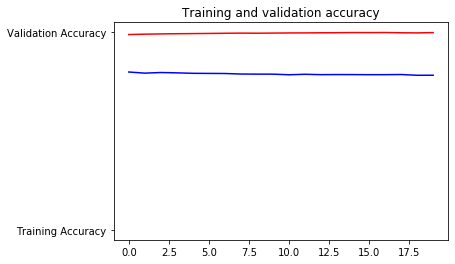

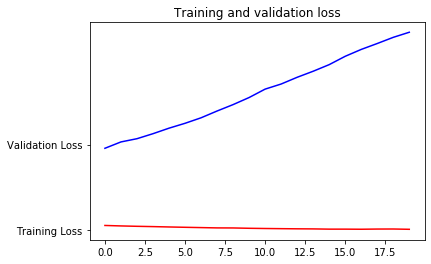

<Figure size 432x288 with 0 Axes>

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [33]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf=8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [36]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[11], [], [1430], [968], [4], [1537], [1537], [4738], [], [790], [2015], [11], [2922], [2191], [], [790], [2015], [11], [579], [], [11], [579], [], [4], [1783], [4], [4508], [11], [2922], [1277], [], [], [2015], [1005], [2922], [968], [579], [790], []]
